# Crime in Sweden, distribution and trends. 

### Date: 2021-06-02

### Author: Mercy Lard 


## 

### Technical notes/References

#### Crime data source: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences
#### -> Survey of a selection of crimes distributed over a 70 year period.

#### Population data source: https://www.scb.se/en/

#### Data for Population by region, marital status, age and sex for years 1968-2020: http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101A/BefolkningNy/

-> Population data is taken from Statistical Crime Agency, or Statistiska Centralbyrån (SCB). Download: Variables selected as xlsx file. Observations: Population; Region: Sweden; Marital Status: Not selected; Age: Not selected; Sex: Not Selected; Year: Not selected

-> Population Information: The tables show the conditions on December 31st for each respective year according to administrative subdivisions of January 1st of the following year.

-> Official statistics: Yes, Latest update: 2021-02-22, Contact: Tomas Johansson, Statistics Sweden, +46 010-479 64 26, tomas.johansson@scb.se, (SCB) Statistikservice, Statistics Sweden, +46 010-479 50 00, information@scb.se

#### Popluation data source (older data): https://web.archive.org/web/20170216053029/http://www.scb.se/en/finding-statistics/statistics-by-subject-area/population/population-composition/population-statistics/pong/tables-and-graphs/yearly-statistics--the-whole-country/population-and-population-changes-17492015/

-> From this archive source, I retreive the population data from 1950-1967. Downloaded as an excel file.

#### Understanding the data: 
Here you can find an English translation of the Swedish Criminal Code. https://www.government.se/press-releases/2020/01/an-up-to-date-english-translation-of-the-swedish-criminal-code/

The different data sets of crimes from Brå from different time periods and areas in Sweden:http://statistik.bra.se/solwebb/action/index

https://bra.se/statistik/kriminalstatistik/anmalda-brott.html

To see the full statistics on reported crimes for each section of the Swedish criminal code from 2008 - 2020: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences Under Reported offences select -> download tables -> period -> year.




## 

### Project goals - The Business Case


Here I present my steps for retrieving a selection of the crime data in Sweden for the last 70 years and how I look at trends with the aim to perform some predictions on time series based data with machine learning methods. I also include the population data which may act as a predictive variable in the algorithm. 

I will perform this analysis as a way to look at the broader picture in terms of crime in Sweden. From this I can then look deeper into regions where crime is cocentrated and look for possible predictions of how it will develop in the coming years based on previous and current growth, so called 'forcasting'. 

-> NEXT LEVEL <- 

Then, I discuss the types of crimes which may be prevented or reduced with the help of surveillance or anti-theft services. 

This is relevant for crime prevention authorities, i.e. police and for security companies which would like to provide a tailored suite of anti-theft services to their clients. 

For example, if the crime for burglaries and breakins is quite low, but car theft is high, one could offer security cameras specifically for monitoring vehicles where applicable. Other security services may be developed from this knowledge.

## 

### Comparison - Brå 2020 Swedish Crime Survey

Interestingly, one can also look at the surveys produced by Brå, in order to see information about how persons self reported crimes compare with their perception of crime.

The following images are taken from the Swedish Crime Survey of 2020

#### Reference: https://www.bra.se/bra-in-english/home/publications/archive/publications/2020-10-15-swedish-crime-survey-2020.html?lang=sv

In the sample of 200,000 persons there were approximately 74,000 respondents. 

Example: Self reported victimisation of property at residential domicile.



![title](Self_reported_victimisation_SCS_Brå_2020.jpg)


The data above shows that in the areas of vehicle theft, theft from a vehicle and burglary self reported statistics are stable of the past four years, while bicicle theft has increased in the last two years, with a general upwards trend form 2012. Meanwhile, self reported car theft has decreased significantly since 2006. 

## 


![title](Brå_2020_Survey_Fig25_vehicle_theft.jpg)

While the self reporting of vehicle theft is around 1 % of the surveyed participants, those who actually own a car report higher concern (very often/quite often) over being a victim at about 27 %, which is comparable between genders.


## 


### Data retreival and formatting

In order to fetch the files I downloaded the data from Brå, SCB and SCB web archived data. 

The way the table was structured made it a very slow process to try and import using pandas. In order to read the files with pandas into my jupyter nb, I first created a new csv and removed empty cells, spurious headers/titles and other unneccesary discriptions, such as notes listed above. I then renamed column headers to allow for easier and more descriptive naming, which would be compatible in SQL environments. There were very few columns (21 total), so it was simple to do by hand.

Possible to use Alteryx to parse the data from different files: https://help.alteryx.com/current/designer/multi-row-formula-tool
Or use pandas tricks to import from a messy excel file: https://towardsdatascience.com/read-messy-excel-files-like-a-pro-27880306ad0b
Or this if you have semi structured excel file: https://pbpython.com/pandas-excel-range.html

We must note that from the selection of crimes summarized by Brå, there are a few instances where the crimes are actually subcategories (sections, §) within the larger categories (Chapters).

### The column keys are as follows:
a.  year - the year ranges from 1950 - 2020

b.	total_crimes - total number of reported crimes

c.	total_penal_crimes - total crimes against the Penal Code

d.	total_life_and_health - Out of total crimes against Penal Code: Crimes against life and health (Ch 3).

e.	murder - Out of total crimes against life and health, those crimes consisting of Completed murder, manslaughter and assault resulting in death, (Ch. 3, § 1, 2, 5, 6).

f.	assault - Out of total crimes against life and health, those crimes consisting of assault, and aggravated assault. (Ch. 3, § 5,6 Assault not resulting in death)

g.	total_sexual_offence - Out of total crimes against Penal Code: Sexual offences (Ch. 6)

h.	rape - Out of total sexual offences, those crimes classified as rape (Ch. 6, § 1, 4)

i.	total_theft - Out of total crimes against Penal Code: Theft, robbery, and other offences of stealing (Ch. 8)*

j.	burglary_no_guns - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those burglaries, not involving fire arms. (Ch. 8, § 1, 2, 4 Burglary, not involving fire arms)**

k.	burglary_home - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those burglaries, not involving fire arms, which occurred in flats, and private houses. (Ch. 8, § 1, 2, 4 Burglary, not involving fire arms: In dwellings, summer houses, etc: In flats, private houses)** ***Subset of above***

l.	vehicle_theft - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include stolen vehicles. (Ch. 8, § 7 Vehicle theft: Car theft)

m.	theft_out_of_vehicle - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include theft out of a stolen vehicle. (Ch. 8, § 1, 2, 4 Other theft: From vehicle: Out of a motor vehicle)

n.	theft_shop - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include theft from shops, department stores etc. (Ch. 8, § 1, 2, 4 Other theft: From shops, department stores, etc.)

o.	theft_aggravated - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include robbery and aggravated robbery (i.e. with a weapon intended to harm). (Ch. 8, § 5,6)

p.	fraud - Out of total crimes against Penal Code: Fraud and other acts of dishonesty (Ch. 9)

q.	criminal_damage - Out of total crimes against Penal Code: Criminal damage (Ch. 12)

r.	total_other_penal_crimes - total OTHER crimes against Penal Code, Crimes against special penal legislation, not included in column c.

s.	narcotics - Of total OTHER crimes against Penal Code, Crimes against special penal legislation: Crimes against the Narcotics Drugs (Penal) Act.

t.	driving_under_influence -  Of total OTHER crimes against Penal Code, Crimes against special penal legislation: Crimes against the Road and Traffic Offences Act: Driving under influence of alcohol -incl. aggravated offences- (§ 4, 4a) AND Driving under the influence of illicit drugs -including aggravated offences- (§ 4 2 st)

u.	population - Population in Sweden total for 1950 - 2020


## 

 I will first start by importing relevant libraries, reading the data and looking at an overview of the dataframe. I will then go into exploratory data analysis and finally build my model. 

### Import relevant libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np


### Read in the data

#### Here we define the data frame as 'crime' when reading the csv file, while setting the index to year. This will make it easier to index the individual columns over time.

In [7]:
crime = pd.read_csv('Reported_crimes_analysis_1950_2020.csv', index_col='year')


### Overview of data

#### Here we can check to see that there are integers or floats with no null values in our columns.

In [8]:
#Check the data to see that there are no null items in the list and that the data is of the correct type. 
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1950 to 2020
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   total_crimes              71 non-null     int64
 1   total_penal_crimes        71 non-null     int64
 2   total_life_and_health     71 non-null     int64
 3   murder                    71 non-null     int64
 4   assault                   71 non-null     int64
 5   total_sexual_offence      71 non-null     int64
 6   rape                      71 non-null     int64
 7   total_theft_robbery       71 non-null     int64
 8   burglary_no_guns          71 non-null     int64
 9   burglary_home             71 non-null     int64
 10  vehicle_theft             71 non-null     int64
 11  theft_out_of_vehicle      71 non-null     int64
 12  theft_shop                71 non-null     int64
 13  theft_aggravated          71 non-null     int64
 14  fraud                     71 non-null  

In [9]:
#Check the first few years of data.
crime.head()

,total_crimes,total_penal_crimes,total_life_and_health,murder,assault,total_sexual_offence,rape,total_theft_robbery,burglary_no_guns,burglary_home,vehicle_theft,theft_out_of_vehicle,theft_shop,theft_aggravated,fraud,criminal_damage,total_other_penal_crimes,narcotics,driving_under_influence,population
year,,,,,,,,,,,,,,,,,,,,
1950,195261,161778,8441,66,7382,2829,350,110660,20714,0,0,0,0,190,14653,5063,33483,5,3460,7041829
1951,232252,194753,8809,74,7718,3205,449,134324,24159,0,0,0,0,214,21907,5165,37499,9,4658,7098740
1952,225169,185787,8485,69,7378,2756,310,131530,26511,0,0,0,0,198,15485,5826,39382,24,5530,7150606
1953,208632,192851,8517,70,7557,3198,330,138365,25889,0,0,0,0,261,14994,6330,15781,17,6508,7192316
1954,218391,201317,9057,85,7753,2986,339,142909,28348,0,0,0,0,277,17005,7257,17074,27,7442,7234664


In [10]:
#Get a quick look at simple statistics of the data set.
crime.describe()

,total_crimes,total_penal_crimes,total_life_and_health,murder,assault,total_sexual_offence,rape,total_theft_robbery,burglary_no_guns,burglary_home,vehicle_theft,theft_out_of_vehicle,theft_shop,theft_aggravated,fraud,criminal_damage,total_other_penal_crimes,narcotics,driving_under_influence,population
count,7.100000e+01,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,7.100000e+01
mean,9.165770e+05,7.850023e+05,43283.126761,170.056338,40539.098592,7699.352113,2226.380282,475177.211268,103332.633803,14372.647887,33723.000000,77398.859155,37193.070423,4558.873239,74683.957746,86111.704225,131110.098592,37466.690141,19615.802817,8.491373e+06
std,4.318933e+05,3.604644e+05,30518.081780,93.377710,28849.345665,6206.172904,2407.972273,189619.280290,39329.856980,8383.444545,20652.395214,53360.563800,24150.233132,3389.294532,56190.563457,63848.655697,77885.483882,34054.389263,6546.392316,8.394421e+05
min,1.952610e+05,1.617780e+05,8441.000000,59.000000,7378.000000,2377.000000,310.000000,110660.000000,20714.000000,0.000000,0.000000,0.000000,0.000000,190.000000,14653.000000,5063.000000,15781.000000,0.000000,3460.000000,7.041829e+06
25%,5.361500e+05,4.590105e+05,16451.500000,110.500000,15199.500000,3202.500000,600.500000,320002.000000,80552.000000,8790.000000,18140.500000,47878.000000,18209.500000,1129.000000,42664.500000,26768.000000,70666.000000,6001.000000,14922.500000,7.911984e+06
50%,1.018349e+06,8.943960e+05,34304.000000,146.000000,31996.000000,4098.000000,1035.000000,517557.000000,107578.000000,17031.000000,32011.000000,69967.000000,43582.000000,3806.000000,57680.000000,74008.000000,130286.000000,30785.000000,20931.000000,8.358139e+06
75%,1.229871e+06,1.078990e+06,66912.000000,205.000000,63404.000000,9964.000000,2374.500000,648518.000000,138628.000000,21051.000000,50138.000000,124990.500000,58923.500000,8550.000000,97707.000000,140757.500000,165050.500000,55627.000000,24629.500000,8.958229e+06
max,1.566872e+06,1.271106e+06,94943.000000,449.000000,89457.000000,25030.000000,9360.000000,740376.000000,155902.000000,24647.000000,75512.000000,159552.000000,69551.000000,9719.000000,260260.000000,233610.000000,306424.000000,124044.000000,31114.000000,1.037930e+07


In [11]:
#tran_crime= crime.transpose()
#tran_crime


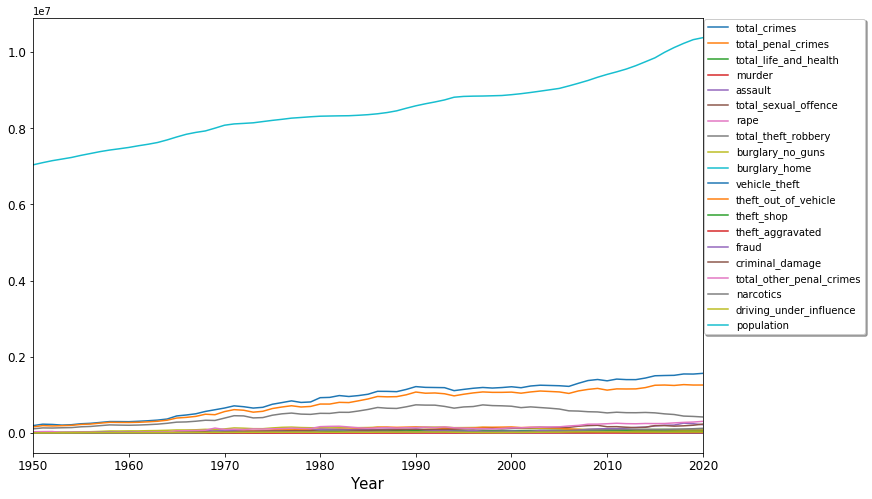

In [13]:
#Plot the crimes over the full time period.
ax = crime.plot(figsize=(12,8))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)
ax.set(xlim=(1950,2020))
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.25, 1.01))


As we can see from the plot above, we have to separate out the different types of crimes to see better how they are evolving over time and their relationships. We cannot easily visualize so many variables!

#### We can do this by creating new data frames with only subcategories such as theft, or by selectively plotting these items together.


In [14]:
#Create a sub-df which looks at only theft under Ch. 8. 
theft = crime.loc[:,['burglary_home', 'vehicle_theft', 'theft_out_of_vehicle', 'theft_shop', 'theft_aggravated']]
theft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1950 to 2020
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   burglary_home         71 non-null     int64
 1   vehicle_theft         71 non-null     int64
 2   theft_out_of_vehicle  71 non-null     int64
 3   theft_shop            71 non-null     int64
 4   theft_aggravated      71 non-null     int64
dtypes: int64(5)
memory usage: 3.3 KB


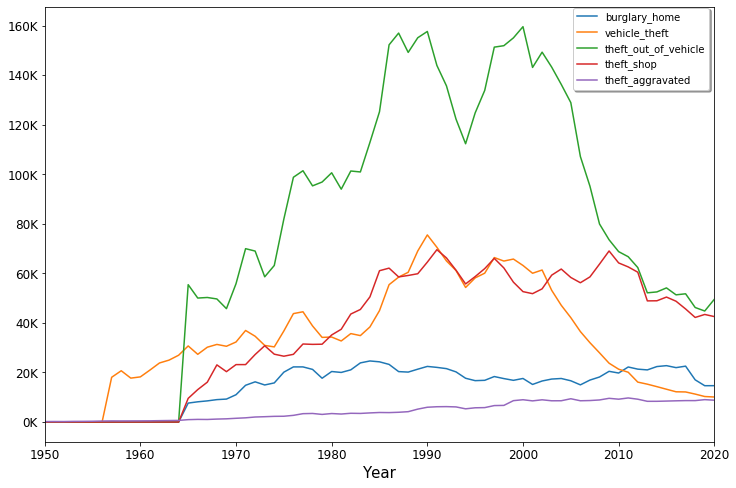

In [15]:
#Plot the theft over the full time period.
ax = theft.plot(figsize=(12,8))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)
ax.set(xlim=(1950,2020))
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.0, 1.01))

#ax.yaxis.set_major_formatter(ticker.EngFormatter())
#Alternative to set y-axis with 'k', but does not look as nice. 

#### We can then create a pairplot using sns on the theft data frame in order to see any possible positively correlated variables.

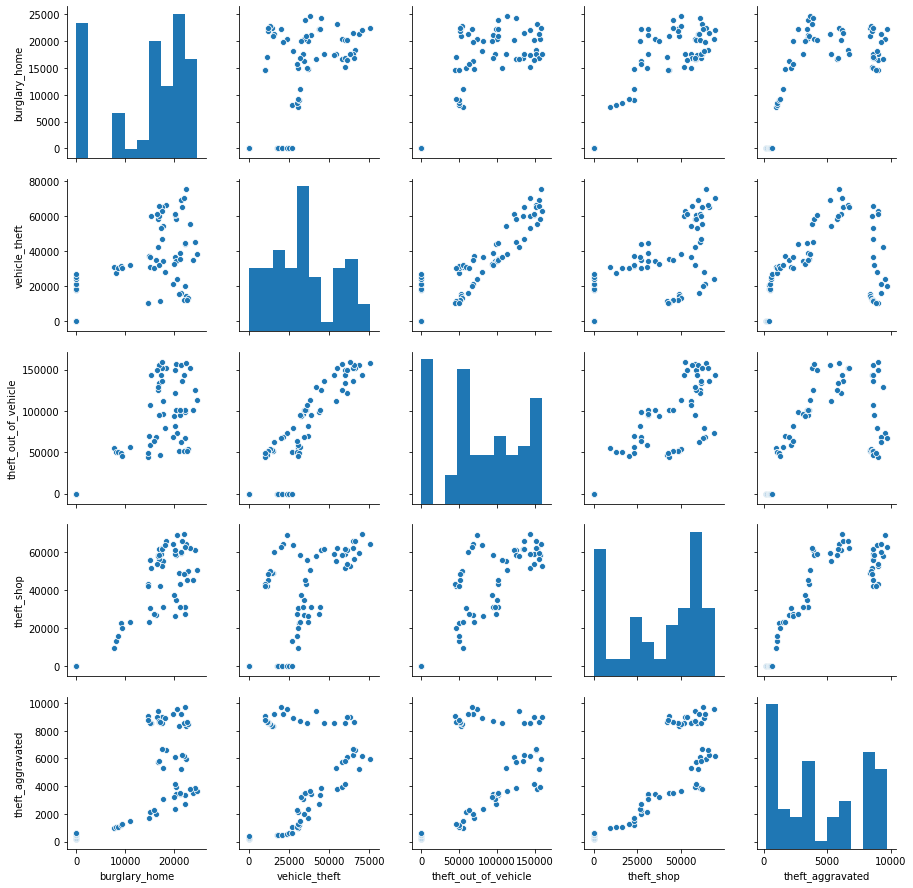

In [16]:
sns.pairplot(data=theft)

#Alternatively, one could simply call the variables from the original dataframe.
#sns.pairplot(data=crime, vars=['total_theft','burglary_no_guns', 'burglary_home', 'vehicle_theft', 'theft_out_of_vehicle', 'theft_shop', 'theft_aggravated'])

#Note axis formating according to previous selection will not work with sns pairgrid.


We can see that vehicle theft and theft out of a vehicle are most positively correlated. Which means if a theif is already stealing a vehicle, they will likely also steal something from inside the vehicle, but not necessarily vic versa.

#### We can also perform a similar visualisation of correlation with seaborns heatmap.

(5, 0)

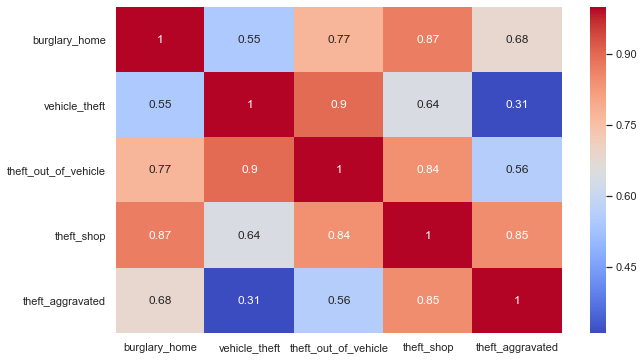

In [17]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.heatmap(theft.corr(),annot=True,cmap='coolwarm', annot_kws={'size':12})
plt.ylim(5, 0)
#also looks good with mako

#### Create a simple scatterplot of vehicle theft and theft from a vehicle to look more closely at the correlation from  the pairplot above.

Text(0.5, 0, 'Vehicle_Theft')

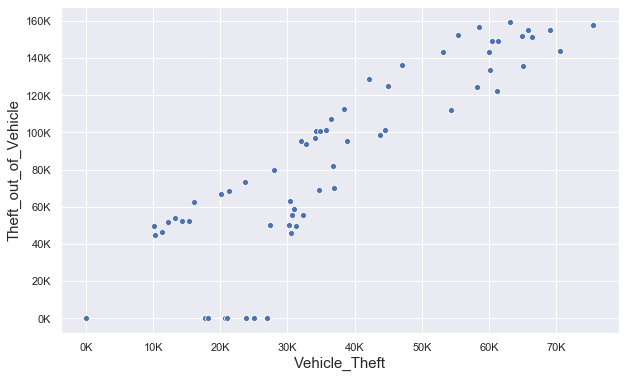

In [18]:
#Seaborn scatterplot
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='vehicle_theft', y='theft_out_of_vehicle', data=crime)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels) 
ax.set_ylabel('Theft_out_of_Vehicle', fontsize=15)

xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000] 
ax.set_xticklabels(xlabels) 
ax.set_xlabel('Vehicle_Theft', fontsize=15)
#plt.ylabel("Theft_out_of_Vehicle")
#plt.xlabel("Vehicle_Theft") Unnecessary with above set_x or set_ylabel


#### We can then create a simple plot of the vehicle_theft and theft out of a vehicle to observe changes over the entire time period.

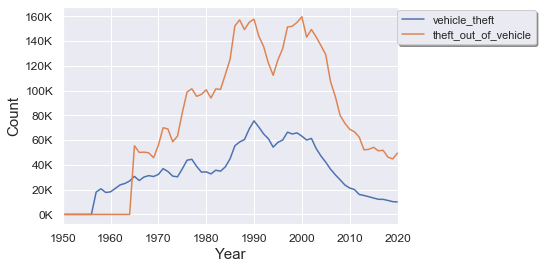

In [19]:

ax = sns.lineplot(x=crime.index, y='vehicle_theft', data=crime, label='vehicle_theft')
sns.lineplot(x=crime.index, y='theft_out_of_vehicle', data=crime, label='theft_out_of_vehicle')

ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Count', fontsize=15)

ax.set(xlim=(1950,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

#plt.ylabel("Counts")
#plt.xlabel("Year")
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.43, 1.01))


It seems like these two objects are highly correlated.

It might be good to think about this before performing modeling with this data as it could be duplicate information, we are not sure how the collection of these two types of crimes are done, i.e. are they actually happening at the same time and being recorded as two separate crimes. 

The same could be said for all other types as well, as we know for cases such as burglary and theft, e.g. if a person is reporting a burglary (unlawful entry to ones home) and also that they have stolen soemthing (theft) these could be recorded as two separate cases.  We do not have this data included in the dataframe for now.

#### Create a simple plot of the theft_shop and burglary_home, which has the next highest correlation of 0.87.


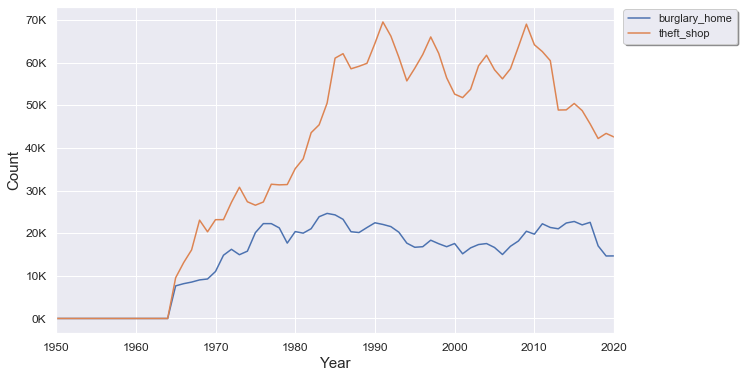

In [20]:
#Create a simple plot of the theft_shop and burglary_home, over the entire time period.
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=crime.index, y='burglary_home', data=crime, label='burglary_home')
sns.lineplot(x=crime.index, y='theft_shop', data=crime, label='theft_shop')
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Count', fontsize=15)
#ax.set(ylim=(-100,25000))

ax.set(xlim=(1950,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

#plt.ylabel("Counts")
#plt.xlabel("Year")
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.23, 1.01))


This pair of crimes does not seem to be highly correlated, but interesting non the less, in that we see an overall increase in crimes for both around the 1980's leading to a decrease in the 2000's and then an increase again in 2010's. 

#### Another interesting comparison would be to look at home burglaries and aggravated theft. 

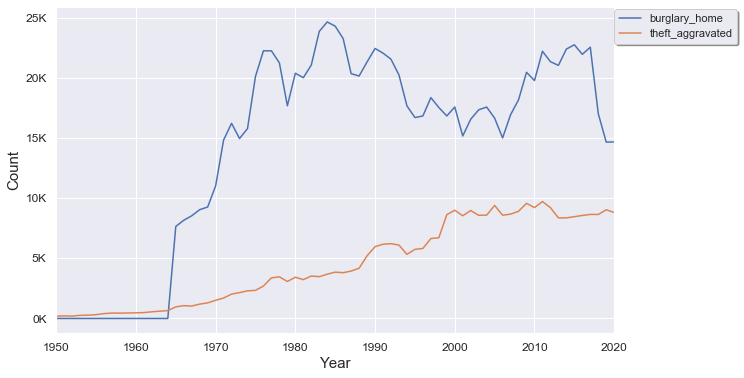

In [21]:
#Create a simple plot of the burglary of a home and aggravated theft over the entire time period.
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=crime.index, y='burglary_home', data=crime, label='burglary_home')
sns.lineplot(x=crime.index, y='theft_aggravated', data=crime, label='theft_aggravated')
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Count', fontsize=15)
#ax.set(ylim=(-100,25000))

ax.set(xlim=(1950,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

#plt.ylabel("Counts")
#plt.xlabel("Year")
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.23, 1.01))


Here we do not see any strong correlation between home burglaries and aggravated theft. 

If we consider the larger crime dataframe, we can also look at burgaries which did not include the use of guns and those thefts which are aggravated.
##### Aggravated theft is defined when a person uses life-threatening violence, severe bodily injury, serious illness or exceptional brutality to steal, so called gross robbery.

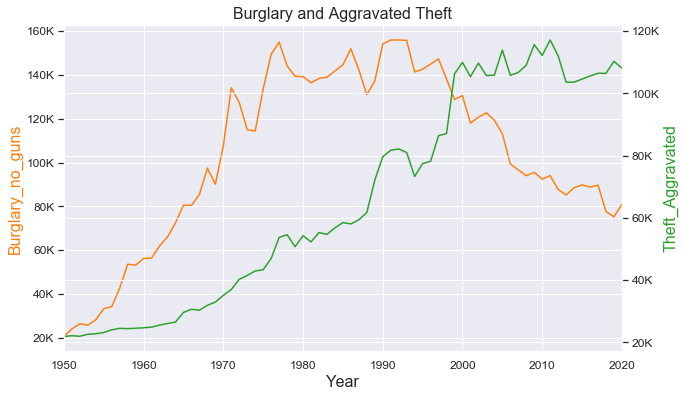

In [22]:
#We can plot burglary without guns and aggravated theft with a dual y-axis method.

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Burglary and Aggravated Theft', fontsize=16)

color='tab:orange'#set color of first y-axis label and data
ax1 = sns.lineplot(x=crime.index, y='burglary_no_guns', data = crime, sort = False, color = color)

ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
ax1.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax1.set_ylabel('Burglary_no_guns', fontsize=16, color = color)
ax1.tick_params(labelsize=12)

ax2 = ax1.twinx()
color = 'tab:green'#change color for second y-axis label and data
ax2 = sns.lineplot(x=crime.index, y='theft_aggravated', data = crime, sort = False, color = color)
ax2.set_ylabel('Theft_Aggravated', fontsize=16,color = color)
ax2.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax2.tick_params(labelsize=12)

ax.set(xlim=(1950,2020))
ax.set_xlabel('Year', fontsize=16) #set after lineplots above in order to have correct label formatting.

plt.show()

Interesting to see the crossover in the late 1990s showing a decrease in burglary without guns and a sharp increase and then plateau in aggravated theft.

## We can also look at theft as it relates to the change in population. 

#### Next, we can start to look at a few other interesting aspects of crime. Namely, assault and rape, driving under the influence (including alcohol and narcotics), and finally fraud and other crimes.

#### We can create two data frames in order to simplify the models. We start with one which is only burglaries not involving guns and one with aggravated theft. 

In [23]:
#Create a sub-df which looks at only theft under Ch. 8, §1,2,4. 
burg_no_gun = crime.loc[:,['burglary_no_guns']]
burg_no_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1950 to 2020
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   burglary_no_guns  71 non-null     int64
dtypes: int64(1)
memory usage: 3.2 KB


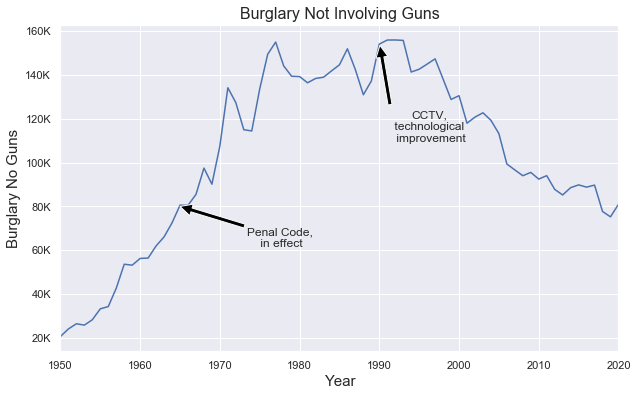

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Burglary Not Involving Guns', fontsize=16)
ax = sns.lineplot(x=crime.index, y='burglary_no_guns', data = crime, sort = False)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Burglary No Guns', fontsize=15)
ax.set_xlim(1950,2020)
ax.set_xlabel('Year', fontsize=15)

# Add labels to the plot
#style = dict(size=10, color='black')
#ax.text(1965, 82000, "Penal Code in effect", ha='right', **style, fontsize=12)

#Alternatively, we can add a callout with an arrow, which is much nicer.
ax.annotate("Penal Code,\n in effect", xy=(1965, 80000),  xycoords='data',
            xytext=(100, -40), textcoords='offset points',size=12, ha='center',
            arrowprops=dict(facecolor='black')) #Note: arrowstyle and face color are not compatible in this plot.

ax.annotate("CCTV,\n technological \n improvement", xy=(1990, 155000),  xycoords='data',
            xytext=(50, -100), textcoords='offset points',size=12, ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05)) #Note: arrowstyle and face color are not compatible in this plot.

plt.show()

#Check out more fun labeling tips here: https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate


In order to select the correct type of model we must look a bit into the type of data that we have.
https://otexts.com/fpp2/tspatterns.html


Now we must decide where we will split the data in order to perform our train test split. For the above data we have a time series that spans over decades, therefore our splitting should be over a portion of these years. We can set some limits on how far back in time we can go, based on the modernization of the Penal Code, monitoring and reporting. 

Because, I do not know details on how the police have changed their reporting (need to do more research and possible interviews) I can instead focus on years after the Penal Code came in to effect, namely from 1965. 

Then I can start to break up the timeline to model after modern surveilence was implemented in homes, private shops, municipal buildings, and other businesses. 

While the technology of CCTV has been around for some time, the major breakthrough in surveillance as during the 1990s when digital multiplexing was developed, allowing the recording of several cameras at once, including time-lapse and motion detection.  
Source: https://en.wikipedia.org/wiki/Closed-circuit_television

Thus we can see that it is most benefitial for our model to look at dates after 1990. Prior to this, we do not have a clear trend or seasonality to the annual crimes commited, it would therefore be quite irrelevant to include all of the data from 1950s and would give a very poor prediction.


We first need to cut the data so that our model can be correctly applied to data after the introduction of updated security cameras, otherwise, we see a contant upwards trend in crime due to the pre-1990's historical trend.

In [1]:
# selecting all data from 1995 and forward
new_bng_data = 45 #index start 1995
burg_no_gun_short = burg_no_gun.iloc[new_bng_data:]
burg_no_gun_short

In [2]:
#Check length of the dataframe
len(burg_no_gun_short)

In [3]:
burg_no_gun_short.describe()

### Train Test Split

We can perform train test split around 2010 which give a good amount of time after which the technological breakthrough occured in 1990s for the cameras with this technology to be used a bit more broadly. 

We will separate the data manually by selecting the last 10 years off of the data frame as our test data. 

By segmenting the data we avoid data leakage, which affects our model performance on new data. We do not want to train on test data!

Reference:https://machinelearningmastery.com/data-leakage-machine-learning/ 

In [28]:
test_size=10 #set up test size
test_ind = len(burg_no_gun_short)-test_size #set up interval between test/train data

In [29]:
train = burg_no_gun_short.iloc[:test_ind] #training data will be dates before 2010
test = burg_no_gun_short.iloc[test_ind:] #test data will be dates after 2010, i.e. from the test interval to the end.

In [4]:
#train

In [5]:
#test

## Creating the Model

We can now import relevant packages

In [32]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.callbacks import EarlyStopping

In [7]:
#Introduce a scaler #Add note here!!!!
scaler = MinMaxScaler()
fit the scaler to the training dataset
scaler.fit(train)

In [34]:
#transform both test and training data with scaler separately
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Time Series Generator

This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

We need to define the length of our generator such that it is less than the test size, in order to predict one year out. We can feed a smaller batch and get out a batch of equal length. 

We can choose 5 years for the length as it is half of the test set.

This length also corresponds to the number of years that the alcohol, narcotics, dopants and tobacco (ANDT) strategy is for slated for before repraisal in the Swedish criminal code. This strategy has been in place since 2002 and is aimed at keeping or improving Sweden's goal as a drug free society. It is revised every 4-5 years. 

References: 

Sweden's Drug Policy: https://en.wikipedia.org/wiki/Drug_policy_of_Sweden

Sweden's new ANDT 2021 (in Swedish): 
https://www.regeringen.se/rattsliga-dokument/proposition/2021/03/prop.-202021132/


In [35]:
length = 5 
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length = length, batch_size = 1)
#See more documentation about TsG to add info here about the relevant
#arguments needed.

In [36]:
X,y = generator[0]

In [37]:
len(X[0])

5

In [38]:
X

array([[[0.91384531],
        [0.95638453],
        [1.        ],
        [0.83197738],
        [0.66238599]]])

In [44]:
y

array([[0.69363371]])

In [45]:
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the array: 
[0.91384531 0.95638453 1.         0.83197738 0.66238599]
Predict this y: 
[[0.69363371]]


### Creating the model

We are only using one feature in our time series. 

We start with long short-term memory model which ....
using the activation function 'relu' ...

We add in one Dense layer ...

Finally, we compile the model using 'adam' optimizer and mean square error as the loss estimator becuase we have a continuous function. ...

### Check notes from lectures to add more information. Other sources?

In [53]:
n_feature = 1

model = Sequential()

model.add(LSTM(50, activation='relu',input_shape=(length, n_feature)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse') #mse because we have a continuous variable


Now we can get a model summary, whic tells us the number of trainable parameters and the output shape of our neural network.

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


Next, we set up our early stopping, and monitor our model for overfitting by looking at the vaildation data, i.e. the test data. We set a patience of 5, which controls the limit for how long the model will look for a stable minimum before stopping, this is done to avoid overfitting.

Reference: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

Next we set up our validation generator. This uses so called validation data (data from our test set) which will be included when fitting the training data. It is not used in training the model, but as a validation in the performance of the model after each epoch.  
Reference: see above

#### Checkpoint

It could be beneficial to know at which point the model reaches a loss minimum according to some baseline that you are interested in. In that case, one should include the model checkpoint callback in order to identify and save the best model observed during training.

In [56]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length = length)

### Model fitting

Finally, we can fit our model with our training data. We add in early stopping and validation data check. We start with 20 epochs, but probably only need a few as the data is quite small.

#### Reference https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [57]:
model.fit_generator(generator,epochs=30,
                   validation_data = validation_generator,
                   callbacks=[early_stop])

Epoch 1/30
11/11 [==============================] - 0s 44ms/step - loss: 0.1383 - val_loss: 0.0525
Epoch 2/30
11/11 [==============================] - 0s 34ms/step - loss: 0.1052 - val_loss: 0.0603
Epoch 3/30
11/11 [==============================] - 0s 34ms/step - loss: 0.0768 - val_loss: 0.0695
Epoch 4/30
11/11 [==============================] - 0s 33ms/step - loss: 0.0494 - val_loss: 0.0787
Epoch 5/30
11/11 [==============================] - 0s 34ms/step - loss: 0.0343 - val_loss: 0.0872
Epoch 6/30
11/11 [==============================] - 0s 34ms/step - loss: 0.0293 - val_loss: 0.0891


### Losses 

Now we can look at our losses and compare to the test data. 

In [58]:
losses = pd.DataFrame(model.history.history)

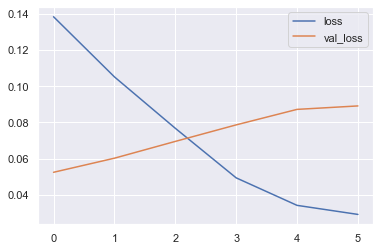

In [59]:
losses.plot()

### Predictions 

Using a for loop we create a list of predictions from the data for a period that is just under what we selected for our training data. If we select too long of a period we will generate more noise.

In [60]:
test_predictions = [] #empty list

eval_batch_one = scaled_train[-length:]  #grab 1ast eval batch points from scaled_train set. Recall that is length of batches is 3 y So grab last 3 points of training set to predict 1 year into the future, and that is the first point in the test set (eval_batch_one).
current_batch = eval_batch_one.reshape((1,length,n_feature)) #reshape batch for model b/c we are passing in 1 item per batch. and set to length and 1 y feature for current batch 

for i in range(len(test)): # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]  #do first prediction. based off of current batch, index first item to be current prediction
    # store the prediction
    test_predictions.append(current_pred) #starts as empty list, and add current prediction to it.
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #move current batch forward one time step. update with the current prediction. and toss out first item in list
    

In [61]:
#rescaling the prediction data so they match the original data. 
true_predictions = scaler.inverse_transform(test_predictions)

In [62]:
test['Predictions'] = true_predictions

/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
test

,burglary_no_guns,Predictions
year,,
2011,94038,101206.353403
2012,87789,101478.566962
2013,85234,101955.576020
2014,88557,102652.026447
2015,89829,103271.994696
2016,88802,104121.051688
2017,89727,104380.606848
2018,77725,104631.231042
2019,75250,104854.085344


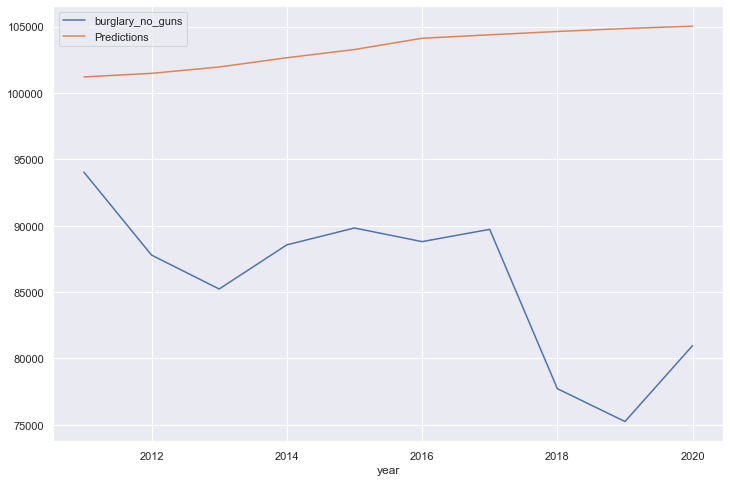

In [64]:
test.plot(figsize=(12,8))
#We have a trend which is on the same order of magnitude as our data. 

When initializing model, we see that we sometimes have an early stop around 3 epochs in the first run, resulting in very high loss around 0.0386. However, rerunning the model a second time, we usually get stopping around 15-20 epochs and a much better loss aroudn 0.0074. If we continue to rerun the model it will perform poorly, and we need to restart the kernal.

In terms of model performance we see that the model does not manage to follow the trend of the data. 
Essentially the network is learning off of the trends that it sees, it doesn't have information about changes in laws, technology etc. but still fails to see that the number of crimes related to burglary not involving guns is decreasing more rapidly over time.

Now we want to do retrain and rescaling and do a forcast on the full data from 1990 to 2020 that we selected.

In [67]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(burg_no_gun_short)
#scaled_full_data

In [68]:
length = 5
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length)


We can use the same number of epochs until we saw our valication_loss start to increase in order to avoid overfitting our data, approximately 15. 

We do not include earlystopping and validation data as previously because that would be cheating.

In [69]:
model = Sequential()

model.add(LSTM(300, activation = 'relu', input_shape=(length, n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=16)


Epoch 1/16
1/1 [==============================] - 0s 60ms/step - loss: 0.1497
Epoch 2/16
1/1 [==============================] - 0s 105ms/step - loss: 0.1340
Epoch 3/16
1/1 [==============================] - 0s 120ms/step - loss: 0.1195
Epoch 4/16
1/1 [==============================] - 0s 112ms/step - loss: 0.1058
Epoch 5/16
1/1 [==============================] - 0s 51ms/step - loss: 0.0929
Epoch 6/16
1/1 [==============================] - 0s 114ms/step - loss: 0.0805
Epoch 7/16
1/1 [==============================] - 0s 96ms/step - loss: 0.0687
Epoch 8/16
1/1 [==============================] - 0s 96ms/step - loss: 0.0576
Epoch 9/16
1/1 [==============================] - 0s 126ms/step - loss: 0.0472
Epoch 10/16
1/1 [==============================] - 0s 110ms/step - loss: 0.0376
Epoch 11/16
1/1 [==============================] - 0s 83ms/step - loss: 0.0291
Epoch 12/16
1/1 [==============================] - 0s 104ms/step - loss: 0.0220
Epoch 13/16
1/1 [==============================] - 0s 

In [70]:
forecast = [] #create an empty list

period = 4 #predictions for next 4 years

#grab 1ast eval batch points from scaled_training set. 
#Recall that is length of batches is 4 years. So grab last 4 points of 
#training set to predict 1 year into the future, and that is the first
#point in the test set (first_eval_batch). 
eval_batch_one = scaled_full_data[-length:]

#reshape batch for model b/c we are passing in 1 item per batch. 
#and set to length and 1 y feature for current batch 
current_batch = eval_batch_one.reshape((1,length,n_feature))

for i in range(period):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]  #do first prediction. based off of current batch, index first item to be current prediction
    # store the prediction
    forecast.append(current_pred) #starts as empty list, and add current prediction to it.
     # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #move current batch forward one time step. update with the current prediction, and toss out first item in list
    

In [71]:
forecast = scaler.inverse_transform(forecast)

Now we need to create a new timestamp index to include our forecast data into a new data frame which we call forecast_df. 

Add in date information to our forecast data, periods should have a yearly start 'YS' and run for a period of that which we defined in our forecast above, i.e. 4 years.


In [72]:
forecast_index = pd.date_range(start='2021', periods=period, freq='Y')

In [73]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [54]:
forecast_df

,Forecast
2021-12-31,105524.098213
2022-12-31,105352.523658
2023-12-31,105119.013952
2024-12-31,106298.770778


As the above indexing is not the same as what we have in our original dataframe, we need to convert it to match. 

In [74]:
forecast_df_index = pd.DatetimeIndex(forecast_index).year

forecast_df = pd.DataFrame(data=forecast, index=forecast_df_index, columns=['Forecast'])

forecast_df

,Forecast
2021,105974.061136
2022,105888.077807
2023,105744.382605
2024,106891.253410


In [75]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2021 to 2024
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Forecast  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


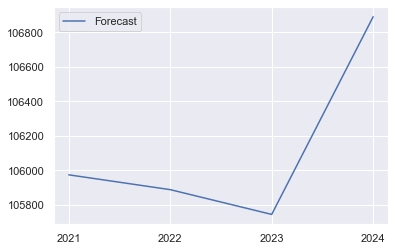

In [76]:
forecast_df.plot(xticks=forecast_df_index)

We can not join the forecast data with our original data in one plot.

Joining pandas plots
https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

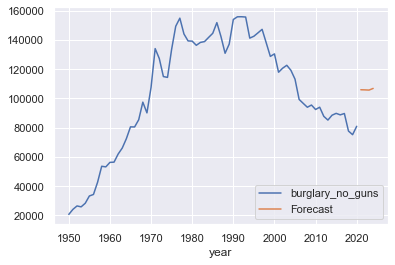

In [77]:
ax = burg_no_gun.plot()
forecast_df.plot(ax=ax)

Now let's see what will happen if we want to increase our prediction timeline to 8 years.

This would be relevant for implementation of a new law or of some new technology, which might take a few years to be properly in force or established, respectively. 

In [59]:
forecast = [] #create an empty list

period = 8 #increase predictions to next 8 years

#grab 1ast eval batch points from scaled_training set. 
#Recall that is length of batches is 8 years. So grab last 8 points of 
#training set to predict 1 year into the future, and that is the first
#point in the test set (first_eval_batch). 
eval_batch_one = scaled_full_data[-length:]

#reshape batch for model b/c we are passing in 1 item per batch. 
#and set to length and 1 y feature for current batch 
current_batch = eval_batch_one.reshape((1,length,n_feature))

for i in range(period):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]  #do first prediction. based off of current batch, index first item to be current prediction
    # store the prediction
    forecast.append(current_pred) #starts as empty list, and add current prediction to it.
     # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #move current batch forward one time step. update with the current prediction, and toss out first item in list
    

In [60]:
forecast = scaler.inverse_transform(forecast)

In [61]:
forecast_index = pd.date_range(start='2021', periods=period, freq='Y')

In [62]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [63]:
forecast_df

,Forecast
2021-12-31,105524.098213
2022-12-31,105352.523658
2023-12-31,105119.013952
2024-12-31,106298.770778
2025-12-31,108011.288018
2026-12-31,109446.596468
2027-12-31,109790.915354
2028-12-31,110261.855798


In [64]:
forecast_df_index = pd.DatetimeIndex(forecast_index).year

forecast_df = pd.DataFrame(data=forecast, index=forecast_df_index, columns=['Forecast'])

forecast_df

,Forecast
2021,105524.098213
2022,105352.523658
2023,105119.013952
2024,106298.770778
2025,108011.288018
2026,109446.596468
2027,109790.915354
2028,110261.855798


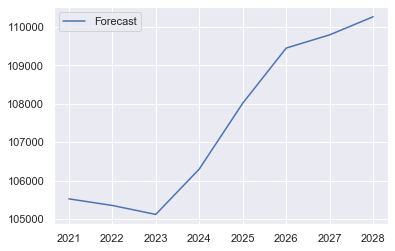

In [65]:
forecast_df.plot(xticks=forecast_df_index)

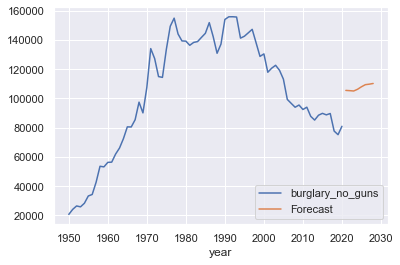

In [66]:
ax = burg_no_gun.plot()
forecast_df.plot(ax=ax)

Clearly the LSTM model is not ideal for predicting on this type of data. Let us now compare with the larger view of total crime in Sweden under the time period from 1950.

## Compare with ARIMA or ETS for multi-step forecasting on univariate datasets.

Do the simpler linear methods e.g. exponential smoothing outperform complex models like decision trees, multilayer perceptrons (MLP), and long short-term memory (LSTM)
https://machinelearningmastery.com/findings-comparing-classical-and-machine-learning-methods-for-time-series-forecasting/

## Notes: to be addressed before finishing. 

An interesting aspect of crime prevention as described by Brå: https://www.bra.se/forebygga-brott/samverkan/egna-forberedelser/identifiera-monster.html

Look into the simplest models in linreg using Python or Matlab are there any which are surprisingly better at predicting trends? Aim to use data 5-10 years before 2020.

#### Interpretation of crime and the statistics

In order to appropriately interpret the crime statistics one must be able to understand a number of things first. For example, 1) how is a crime reported (single act for multiple instances of one person or one for each act, group crime etc.) 2) When is crime reported, i.e. what are the statutes of limitations for crimes, if they occur in the same year as when they were reported or not. 3) Historical trends, can they influence how often crimes are reported, e.g. #MeToo. 4) Reporting, arrests and convictions, i.e. what percentage of the reported crimes are the crimes reported leading to arrests or convictions? 5) Faith in the justice system, i.e. is there a propendency for certain groups to report crimes more or less to the police based on their level in trust in whether or not the police will take action or are affective in pursuing and solving the crime?

https://bra.se/statistik/kriminalstatistik/tolka-statistiken.html
